In [1]:
##Task1

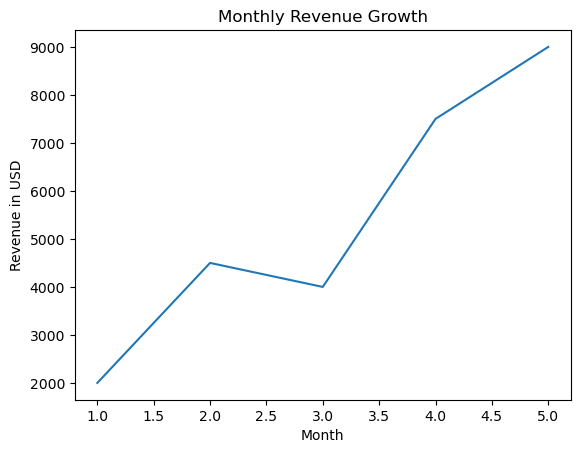

In [2]:
import matplotlib.pyplot as plt
months = [1, 2, 3, 4, 5]
revenue = [2000, 4500, 4000, 7500, 9000]
plt.plot(months, revenue)
plt.title("Monthly Revenue Growth")
plt.xlabel("Month")
plt.ylabel("Revenue in USD")
plt.show()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import boxcox

In [ ]:
###Right skew distribution

In [8]:
data=np.random.exponential(scale=2,size=1000)
df=pd.DataFrame({"Salary":data})

In [10]:
df.head()

,Salary
0,2.111037
1,0.237726
2,4.003171
3,1.748275
4,0.813049


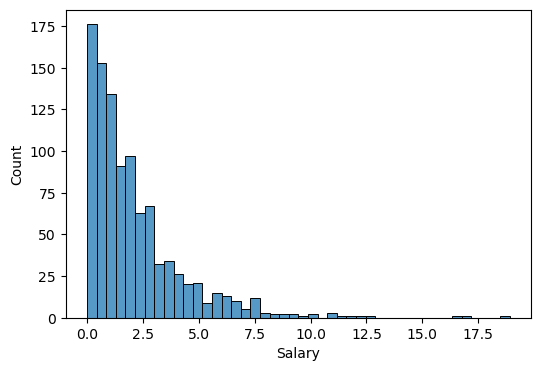

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary)
plt.show()

In [14]:
df.Salary.skew()

np.float64(2.4449436369670714)

In [15]:
df["updated_Salary"],lambda_val=boxcox(df.Salary)

In [16]:
df.head()

,Salary,updated_Salary
0,2.111037,0.818207
1,0.237726,-1.215545
2,4.003171,1.645272
3,1.748275,0.597724
4,0.813049,-0.201918


In [17]:
lambda_val

np.float64(0.23950298819198249)

In [20]:
df.updated_Salary.skew()

np.float64(-0.015128243353462025)

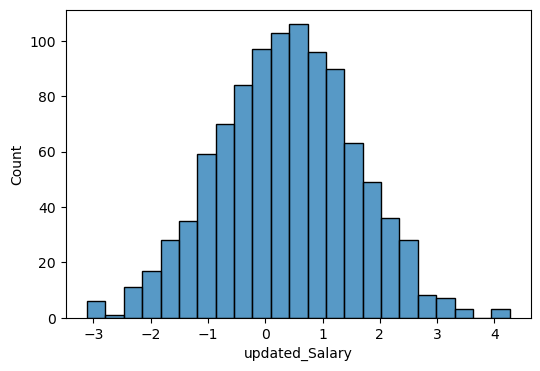

In [21]:
plt.figure(figsize=(6,4))
sns.histplot(df.updated_Salary)
plt.show()

In [22]:
###left skewed distribution

In [23]:
data=np.random.exponential(scale=2,size=1000)
data=10-data
df=pd.DataFrame({"Salary2":data})
df.head()

,Salary2
0,9.831254
1,9.197421
2,7.295271
3,7.823973
4,8.140882


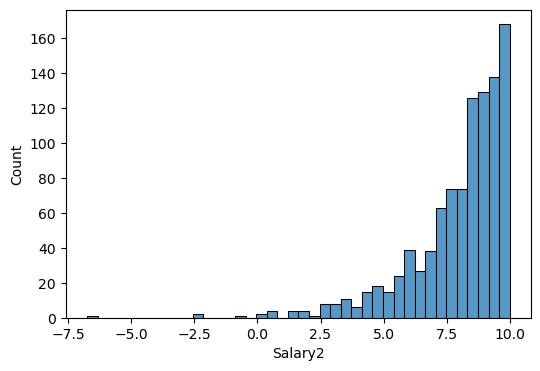

In [24]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary2)
plt.show()

In [28]:
df.Salary2.skew()

np.float64(-1.9596468728747753)

In [31]:
df["reflex_salary"]=(df.Salary2.max()-df.Salary2)+1
df.head()

,Salary2,reflex_salary
0,9.831254,1.168613
1,9.197421,1.802447
2,7.295271,3.704596
3,7.823973,3.175895
4,8.140882,2.858985


In [32]:
max(df.reflex_salary), min(df.reflex_salary)

(17.75599112424273, 1.0)

In [35]:
df["transformed_salary"]=np.log(df.reflex_salary)+1
df.transformed_salary.skew()

np.float64(0.3766555180127414)

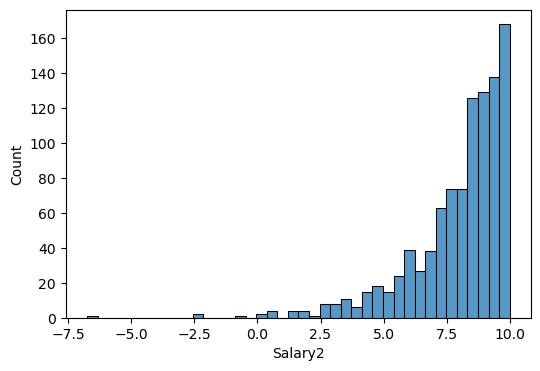

In [36]:
plt.figure(figsize=(6,4))
sns.histplot(df.Salary2)
plt.show()

In [50]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
df=pd.read_csv(r"C:\Users\VIJAYAKUMARA\OneDrive\Documents\Downloads\test2.csv")
df

,Unnamed: 0,Name,Age,Department,Salary
0,0,Alice,25.0,HR,50000.0
1,1,Bob,30.0,IT,60000.0
2,2,Charlie,35.0,Finance,70000.0
3,3,David,NaN,IT,62000.0
4,4,Eve,29.0,HR,NaN
5,5,Alice,25.0,HR,50000.0


In [51]:
df.shape

(6, 5)

In [60]:
df["Age"]=df["Age"].fillna(value=df["Age"].mean())
df["Salary"]=df["Salary"].fillna(value=df["Salary"].median())
df

,Unnamed: 0,Name,Age,Department,Salary,transformed_name
0,0,Alice,25.0,HR,50000.0,0
1,1,Bob,30.0,IT,60000.0,1
2,2,Charlie,35.0,Finance,70000.0,2
3,3,David,28.8,IT,62000.0,3
4,4,Eve,29.0,HR,60000.0,4
5,5,Alice,25.0,HR,50000.0,0


In [61]:
encoder=LabelEncoder()

In [62]:
df["transformed_name"]=encoder.fit_transform(df.Name)

In [63]:
df.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name
0,0,Alice,25.0,HR,50000.0,0
1,1,Bob,30.0,IT,60000.0,1
2,2,Charlie,35.0,Finance,70000.0,2
3,3,David,28.8,IT,62000.0,3
4,4,Eve,29.0,HR,60000.0,4


In [64]:
df[["Department"]].shape

(6, 1)

In [65]:
encoder2=OneHotEncoder(sparse_output=False)

In [67]:
encoded=encoder2.fit_transform(df[["Department"]])

In [68]:
encoder2.get_feature_names_out()

array(['Department_Finance', 'Department_HR', 'Department_IT'],
      dtype=object)

In [69]:
encoded

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [71]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [72]:
scaler=StandardScaler()

In [74]:
df["scaled_salary"]=scaler.fit_transform(df[["Salary"]])
df.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name,scaled_salary
0,0,Alice,25.0,HR,50000.0,0,-1.239501
1,1,Bob,30.0,IT,60000.0,1,0.190693
2,2,Charlie,35.0,Finance,70000.0,2,1.620886
3,3,David,28.8,IT,62000.0,3,0.476731
4,4,Eve,29.0,HR,60000.0,4,0.190693


In [76]:
scaler=MinMaxScaler()
df["scaled_salary"]=scaler.fit_transform(df[["Salary"]])
df.head()

,Unnamed: 0,Name,Age,Department,Salary,transformed_name,scaled_salary
0,0,Alice,25.0,HR,50000.0,0,0.0
1,1,Bob,30.0,IT,60000.0,1,0.5
2,2,Charlie,35.0,Finance,70000.0,2,1.0
3,3,David,28.8,IT,62000.0,3,0.6
4,4,Eve,29.0,HR,60000.0,4,0.5


In [77]:
###DATAVISUALIZATION

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv(r"C:\Users\VIJAYAKUMARA\OneDrive\Documents\Downloads\data_visualization.csv")
df

,Unnamed: 0,Student_ID,Name,Gender,Department,Age,Math_Score,Science_Score,Attendance_Percentage,Study_Hours_per_Week
0,0,1,Aarav,Male,CS,21,78,75,85,10
1,1,2,Diya,Female,IT,22,85,88,90,12
2,2,3,Rohan,Male,CS,20,90,85,95,15
3,3,4,Sneha,Female,ECE,21,67,70,80,8
4,4,5,Arjun,Male,IT,23,88,90,92,14
5,5,6,Meera,Female,ECE,22,76,79,88,9
6,6,7,Kiran,Male,CS,21,92,94,96,16
7,7,8,Ananya,Female,IT,20,81,83,89,11
8,8,9,Rahul,Male,ECE,22,74,72,75,7
9,9,10,Isha,Female,CS,23,89,91,93,15


In [9]:
df.head()

,Unnamed: 0,Student_ID,Name,Gender,Department,Age,Math_Score,Science_Score,Attendance_Percentage,Study_Hours_per_Week
0,0,1,Aarav,Male,CS,21,78,75,85,10
1,1,2,Diya,Female,IT,22,85,88,90,12
2,2,3,Rohan,Male,CS,20,90,85,95,15
3,3,4,Sneha,Female,ECE,21,67,70,80,8
4,4,5,Arjun,Male,IT,23,88,90,92,14


<Figure size 640x480 with 0 Axes>

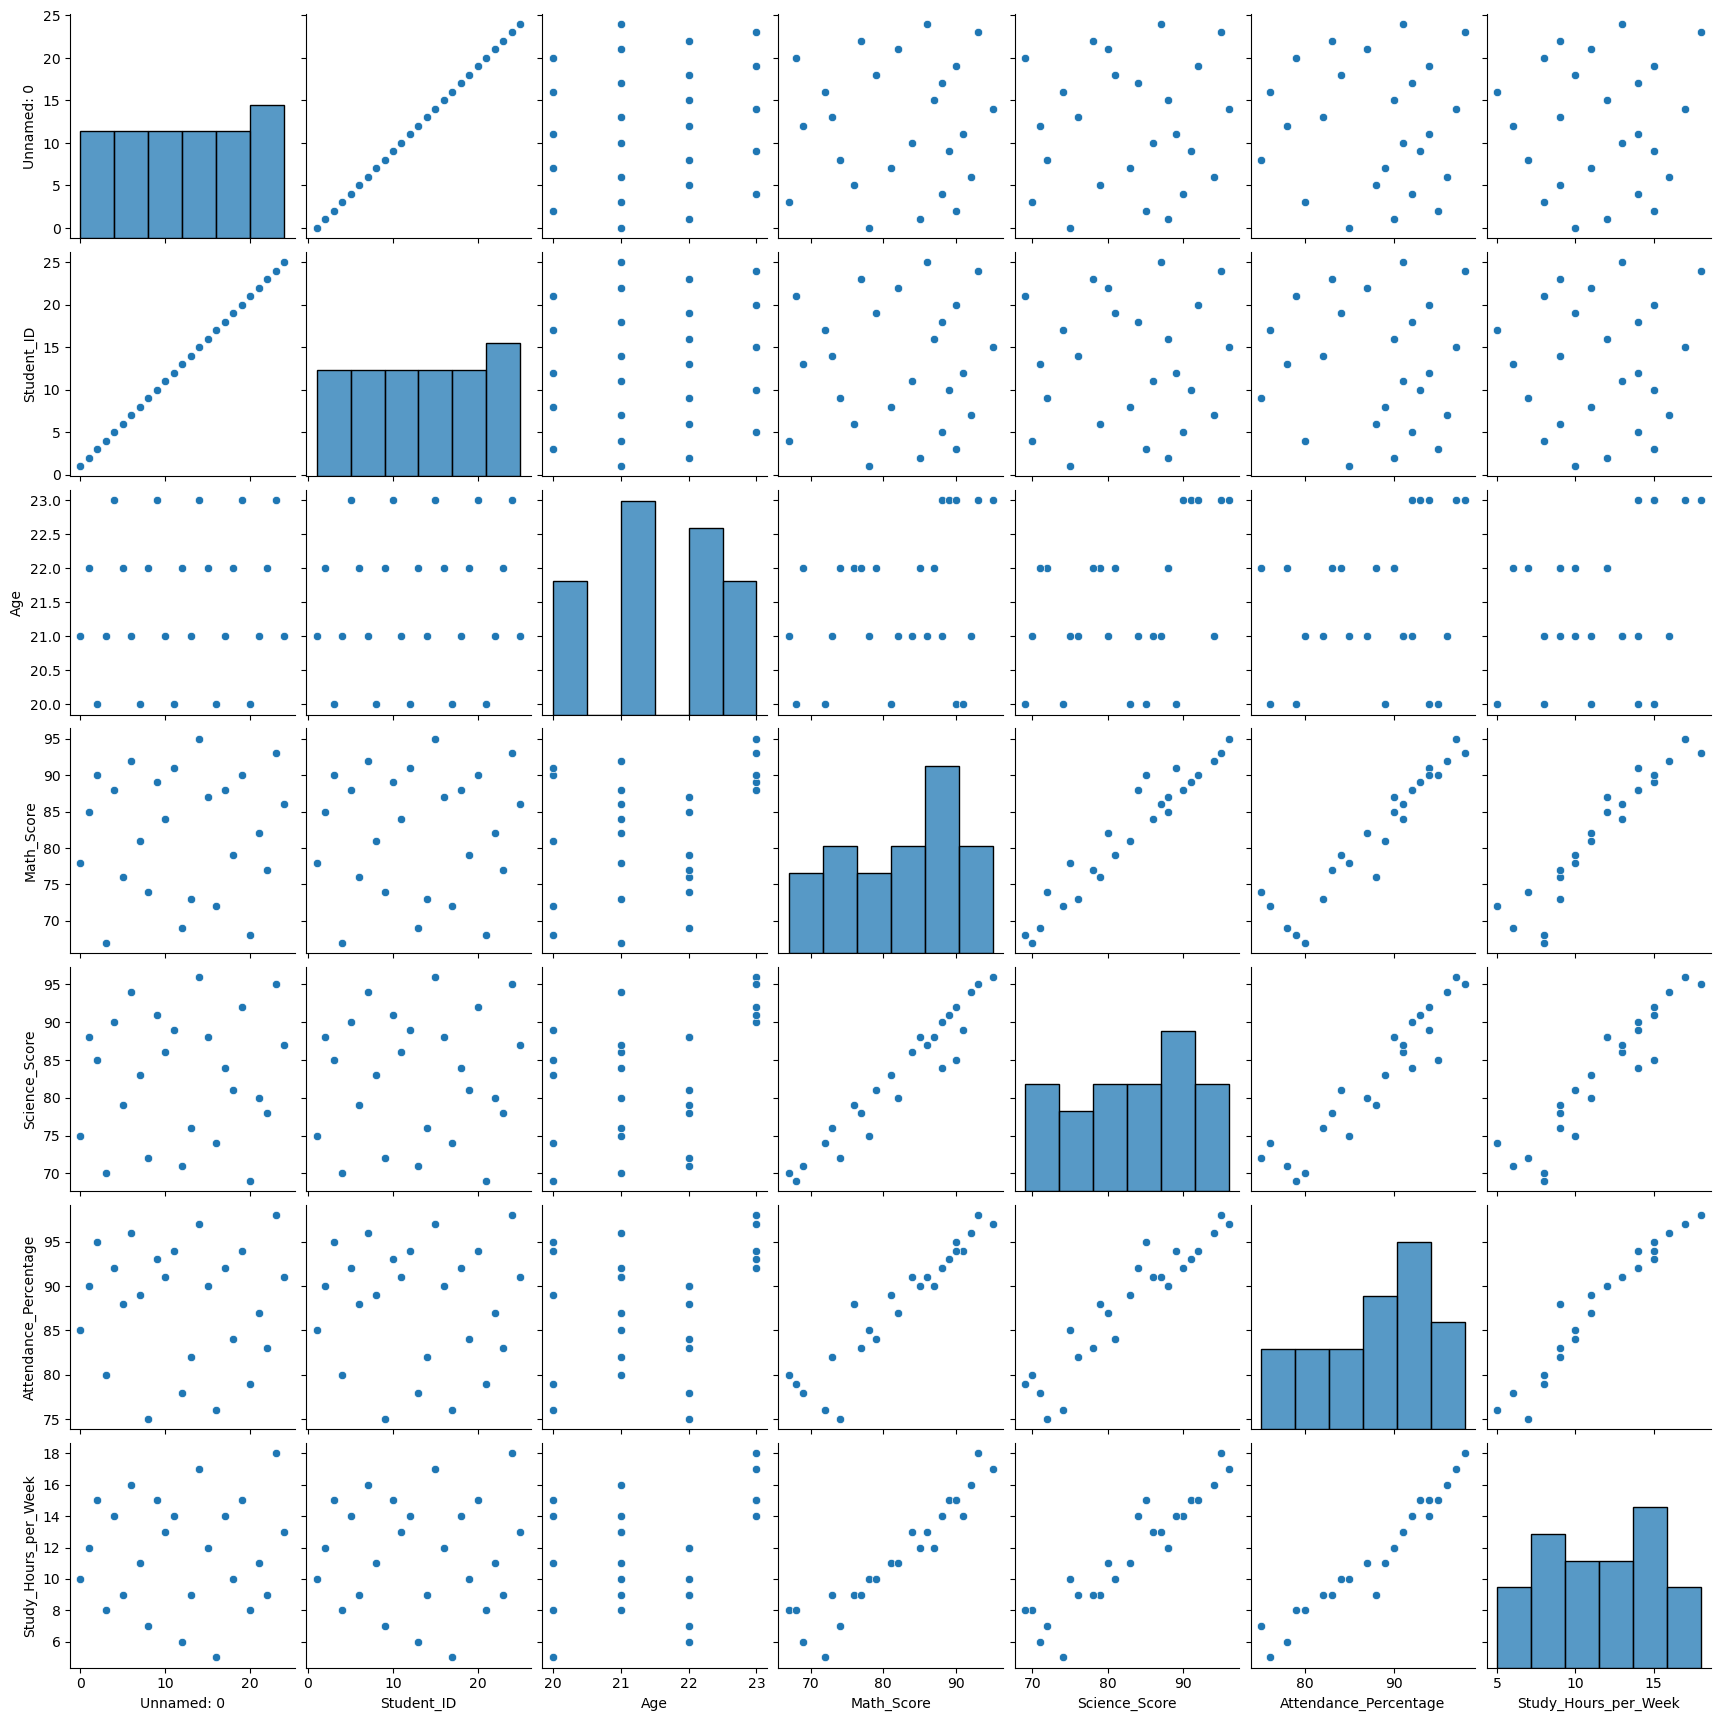

In [10]:
plt.figure()
sns.pairplot(df)

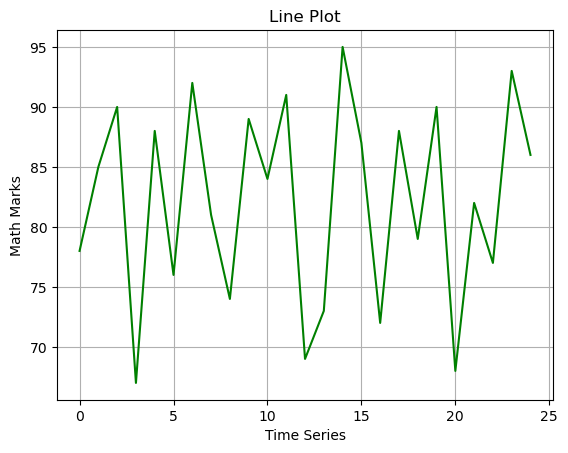

In [11]:
plt.plot(df.Math_Score, color="green")
plt.title("Line Plot")
plt.grid()
plt.xlabel("Time Series")
plt.ylabel("Math Marks")
plt.show()

<Axes: >

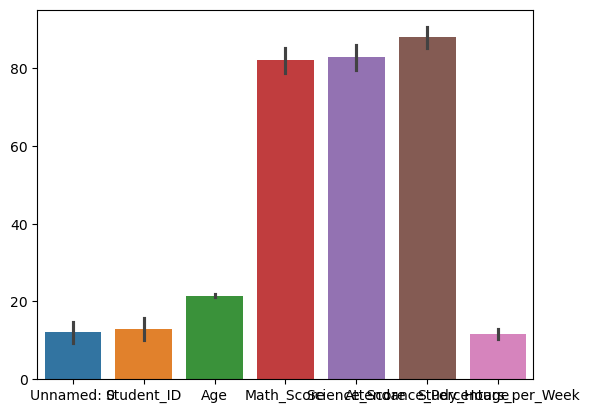

In [14]:
plt.figure()
sns.barplot(df)

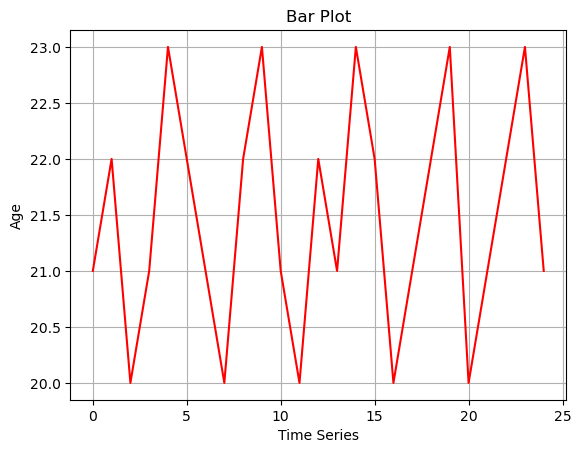

In [12]:
plt.plot(df.Age, color="red")
plt.title("Bar Plot")
plt.grid()
plt.xlabel("Time Series")
plt.ylabel("Age")
plt.show()

<Axes: ylabel='Count'>

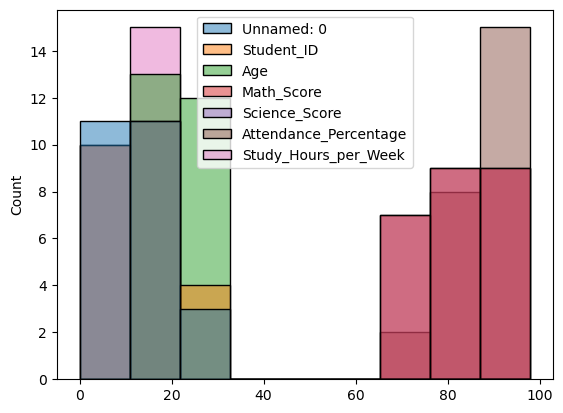

In [18]:
plt.figure()
sns.histplot(df)

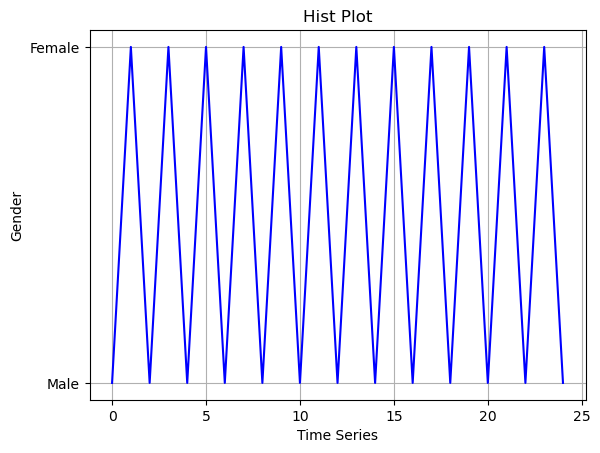

In [19]:
plt.plot(df.Gender, color="blue")
plt.title("Hist Plot")
plt.grid()
plt.xlabel("Time Series")
plt.ylabel("Gender")
plt.show()

<Axes: >

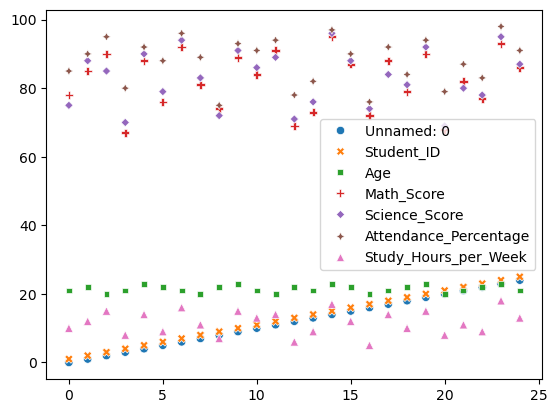

In [20]:
plt.figure()
sns.scatterplot(df)

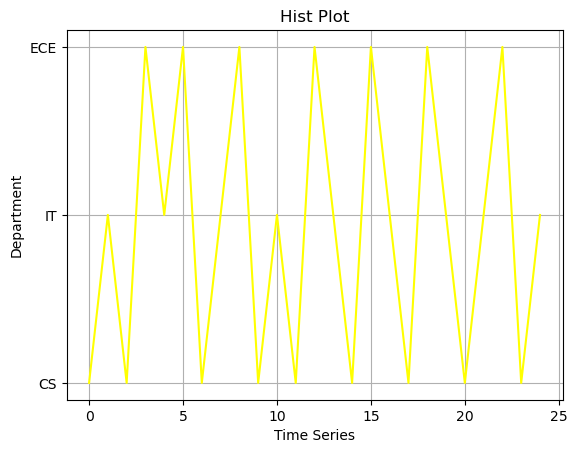

In [21]:
plt.plot(df.Department, color="yellow")
plt.title("Hist Plot")
plt.grid()
plt.xlabel("Time Series")
plt.ylabel("Department")
plt.show()

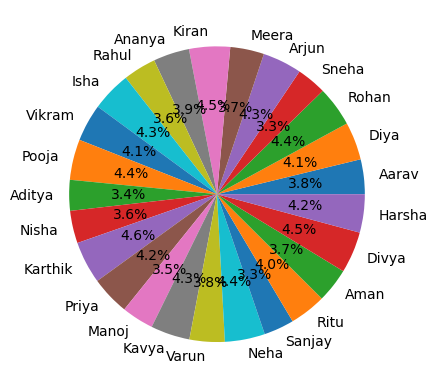

In [39]:
plt.figure()
plt.pie(df['Math_Score'],labels=df['Name'],autopct='%1.1f%%')
plt.show()

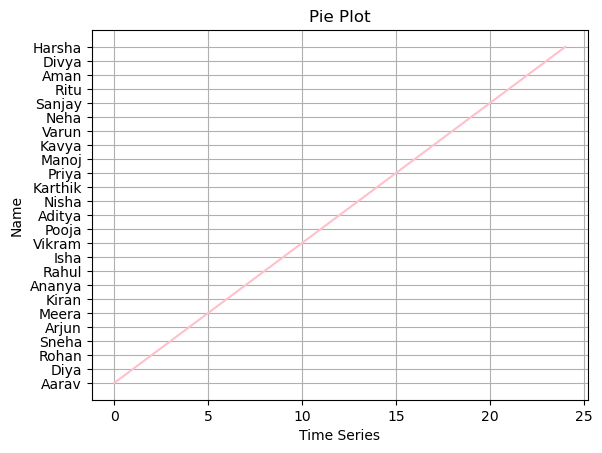

In [40]:
plt.plot(df.Name, color="pink")
plt.title("Pie Plot")
plt.grid()
plt.xlabel("Time Series")
plt.ylabel("Name")
plt.show()

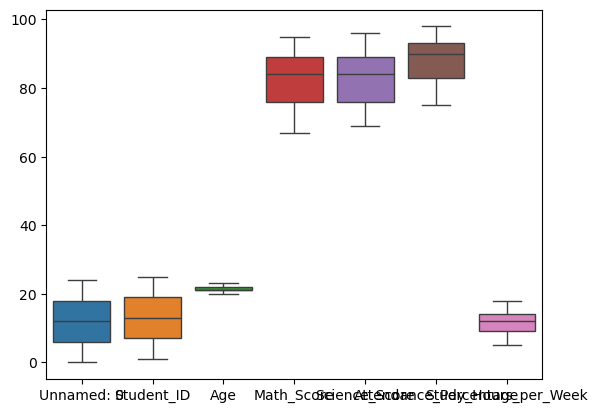

In [48]:
plt.figure()
sns.boxplot(df)
plt.show()

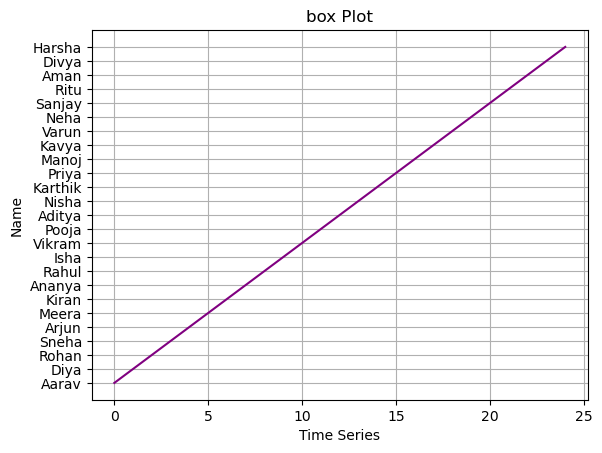

In [50]:
plt.plot(df.Name, color="purple")
plt.title("box Plot")
plt.grid()
plt.xlabel("Time Series")
plt.ylabel("Name")
plt.show()

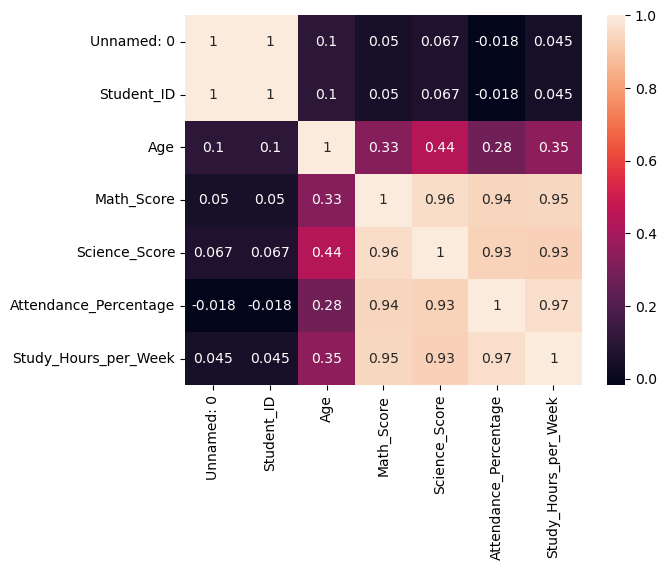

In [54]:
plt.figure()
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True)
plt.show()

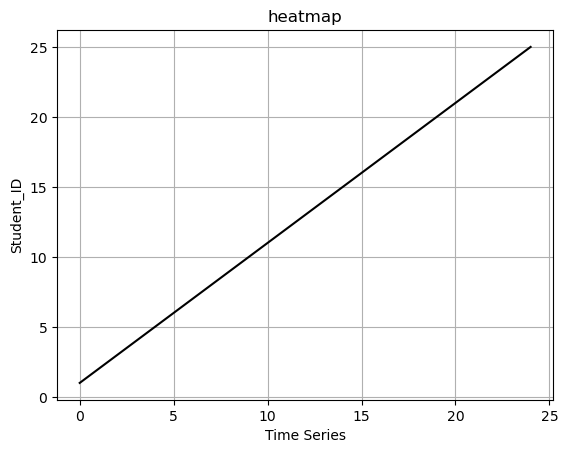

In [56]:
plt.plot(df.Student_ID, color="black")
plt.title("heatmap")
plt.grid()
plt.xlabel("Time Series")
plt.ylabel("Student_ID")
plt.show()

In [62]:
plt.figure()
plt.dotplot(df)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'dotplot'

<Figure size 640x480 with 0 Axes>